### OpenCV 기초 활용법
#### 이미지 불러오기

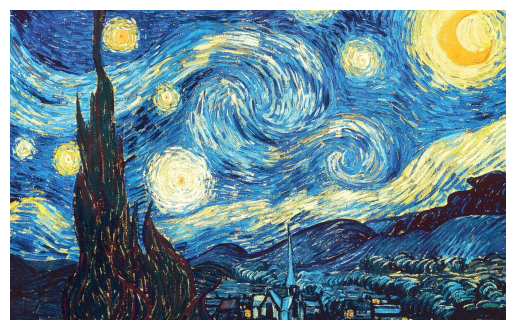

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "../data/images/starry_night.jpg"
image = Image.open(image_path).convert("RGB")  # RGB로 변환
plt.imshow(image)
plt.axis("off")
plt.show()


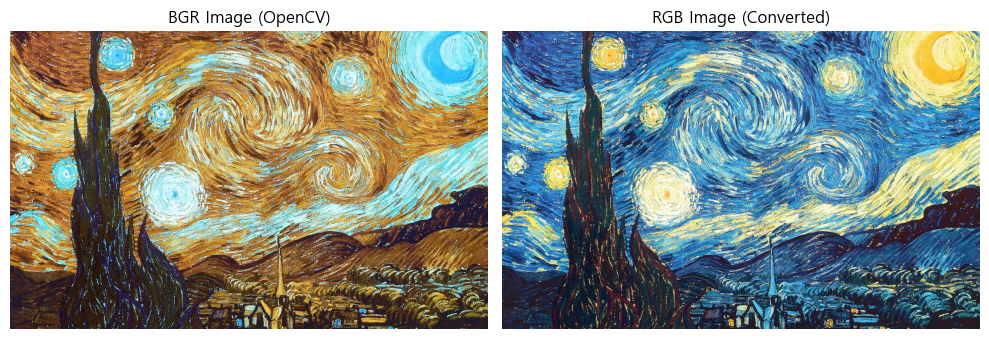

In [20]:
import cv2
image_bgr = cv2.imread(image_path)  # BGR 형식으로 로드
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # RGB 변환

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# BGR 이미지 출력 (OpenCV 기본 형식)
axes[0].imshow(image_bgr)  # BGR
axes[0].set_title("BGR Image (OpenCV)")
axes[0].axis("off")

# RGB 이미지 출력 (변환 후)
axes[1].imshow(image_rgb)  # RGB
axes[1].set_title("RGB Image (Converted)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
MS Gothic C:\Windows\Fonts\msgothic.ttc
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABKIT.TTF
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Franklin Gothic Medium C:\Windows\Fonts\framdit.ttf
NanumGothic C:\Windows\Fonts\.TTF
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF


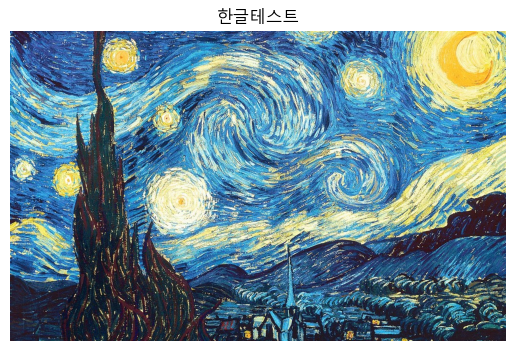

In [21]:
# 한글 폰트 적용
from matplotlib import font_manager
search_font = "gothic"
for font in font_manager.findSystemFonts():
    try:
        font_info = font_manager.FontProperties(fname=font)
        font_name = font_info.get_name()
        font_path = font_info.get_file()
        if search_font in font_name.lower():
            print(font_name, font_path)
    except:
        pass

font_path = "C:\Windows\Fonts\malgunsl.ttf"
font_manager.fontManager.addfont(font_path)
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)


# 폰트 설정
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False # 마이너스 기호 깨지지 않게 설정

image = Image.open(image_path).convert("RGB")  # RGB로 변환
plt.title("한글테스트")
plt.imshow(image)
plt.axis("off")
plt.show()

#### 이미지 정보 확인하기

In [25]:
print("type", type(image_rgb))
print("shape", image_rgb.shape)
print("dimension", image_rgb.ndim)
print("dtype", image_rgb.dtype)
print("size", image_rgb.size)

type <class 'numpy.ndarray'>
shape (640, 1024, 3)
dimension 3
dtype uint8
size 1966080


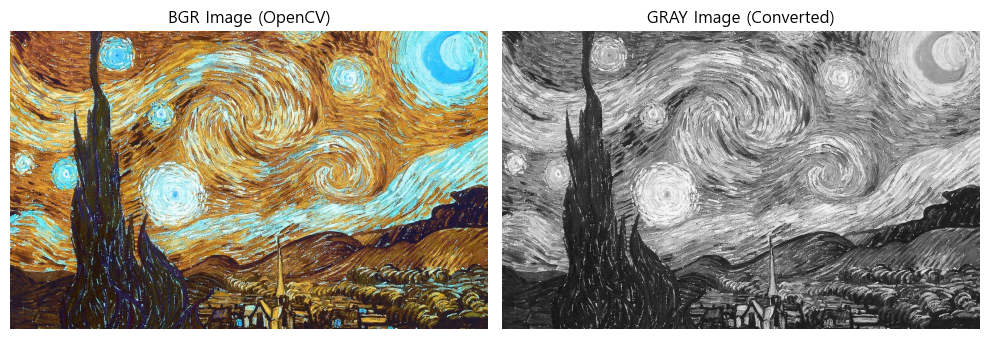

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)  # gray 변환

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# BGR 이미지 출력 (OpenCV 기본 형식)
axes[0].imshow(image_bgr)  # BGR
axes[0].set_title("BGR Image (OpenCV)")
axes[0].axis("off")

# GRAY 이미지 출력 (변환 후)
axes[1].imshow(image_gray, cmap="gray")  # RGB
axes[1].set_title("GRAY Image (Converted)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [30]:
save_path = "./data/images/starry_night_gray.jpg"
cv2.imwrite(save_path, image_gray)

True

#### 이미지 그리기

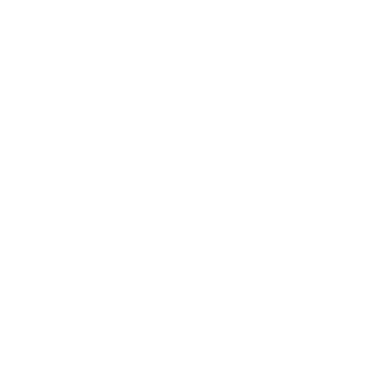

In [82]:
import numpy as np
image = np.zeros((400, 400, 3), dtype=np.uint8) + 255

plt.imshow(image)
plt.axis("off")
plt.show()

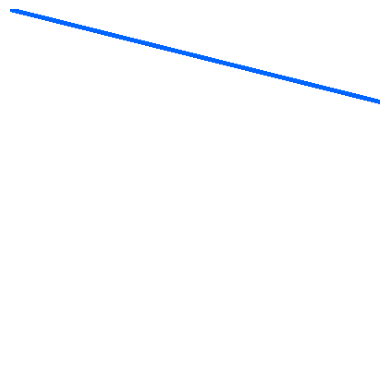

In [47]:
cv2.line(image, (0, 0), (400, 100), (0, 100, 255), 3, lineType=cv2.LINE_8)
plt.imshow(image)
plt.axis("off")
plt.show()

[[100 300]
 [250 100]
 [400 300]]
[[[100 300]]

 [[250 100]]

 [[400 300]]]


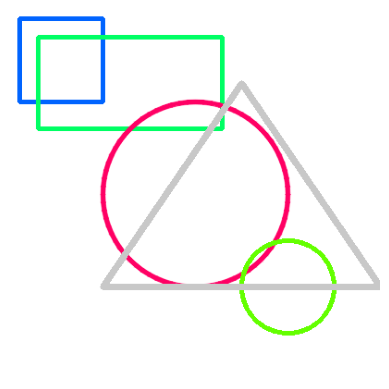

array([[[100, 300]],

       [[250, 100]],

       [[400, 300]]], dtype=int32)

In [83]:
cv2.rectangle(image, (10, 10), (100, 100), (0, 100, 255), 4)
cv2.rectangle(image, (30, 30, 200, 100), (0, 255, 100), 4)
cv2.circle(image, (200, 200), 100, (255, 0, 100), 4, lineType=cv2.LINE_AA)
cv2.circle(image, (300, 300), 50, (100, 255, 0), 4, lineType=cv2.LINE_4)

pts = np.array([[100, 300], [250, 100], [400, 300]], np.int32)
print(pts)
pts = pts.reshape((-1, 1, 2))
print(pts)
cv2.polylines(
    image,
    [np.array([(100, 300), (250, 80), (400, 300)], np.int32).reshape((-1, 1, 2))],
    isClosed=True, color=(200, 200, 200), thickness=5
)

plt.imshow(image)
plt.axis("off")
plt.show()
pts